<a href="https://colab.research.google.com/github/joshuacalloway/csc575project/blob/main/almost_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%%writefile setup.sh

export CUDA_HOME=/usr/local/cuda-10.1
git clone https://github.com/NVIDIA/apex
pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./apex

Overwriting setup.sh


In [4]:
!sh setup.sh


fatal: destination path 'apex' already exists and is not an empty directory.
/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-jeq9pq0k
Created temporary directory: /tmp/pip-req-tracker-ornx3p5o
Created requirements tracker '/tmp/pip-req-tracker-ornx3p5o'
Created temporary directory: /tmp/pip-install-6g5b_wjn
Processing ./apex
  Created temporary directory: /tmp/pip-req-build-nn07nmzc
  Added file:///content/apex to build tracker '/tmp/pip-req-tracker-ornx3p5o'
    Running setup.py (path:/tmp/pip-req-build-nn07nmzc/setup.py) egg_info for package from file:///content/apex
    Running command python setup.py egg_info


    torch.__version__  = 1.8.0+cu101


    running egg_info
    creating /tmp/pip-req-build-nn07nmzc/pip-egg-info/apex.egg-info

In [5]:
!pip install fast-bert

     |████████████████████████████████| 92kB 3.7MB/s 
     |████████████████████████████████| 317kB 6.1MB/s 
     |████████████████████████████████| 778kB 7.8MB/s 
     |████████████████████████████████| 3.0MB 13.4MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 890kB 34.5MB/s 
     |████████████████████████████████| 1.2MB 36.7MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-cp37-none-any.whl size=16172 sha256=50fdea5b17e2efcc785b8cf18049eae60b4a14a542388ba28755db8cb1477abd
  Stored in directory: /root/.cache/pip/wheels/52/df/1b/45d75646c37428f7e626214704a0e35bd3cfc32eda37e59e5f
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=90119ed61966b80d81669ced9a387dc7492a0c2cd7695699e7e3f85421964da4
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built seqeval sacremoses


In [6]:
from fast_bert.data_cls import BertDataBunch

In [7]:
DATA_PATH='./'
LABEL_PATH='./'

In [9]:
databunch = BertDataBunch(DATA_PATH, LABEL_PATH,
                          tokenizer='bert-base-uncased',
                          train_file='train.csv',
                          val_file='val.csv',
                          label_file='labels.csv',
                          text_col='text',
                          label_col='label',
                          batch_size_per_gpu=16,
                          max_seq_length=512,
                          multi_gpu=True,
                          multi_label=False,
                          model_type='bert')

In [13]:
import torch
OUTPUT_DIR='./output'

In [17]:
from fast_bert.learner_cls import BertLearner
from fast_bert.metrics import accuracy
import logging

logger = logging.getLogger()
device_cuda = torch.device("cuda")
metrics = [{'name': 'accuracy', 'function': accuracy}]

learner = BertLearner.from_pretrained_model(
						databunch,
						pretrained_path='bert-base-uncased',
						metrics=metrics,
						device=device_cuda,
						logger=logger,
						output_dir=OUTPUT_DIR,
						finetuned_wgts_path=None,
						warmup_steps=500,
						multi_gpu=True,
						is_fp16=True,
						multi_label=False,
						logging_steps=50)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


/usr/local/lib/python3.7/dist-packages/apex/amp/wrap.py:101: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:1005.)
  return orig_fn(arg0, *args, **kwargs)


Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 4096.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 2048.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 1024.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 512.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 256.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 128.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 64.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16.0
Gradient overflow.  Skipping step, loss scaler 0 reducing l

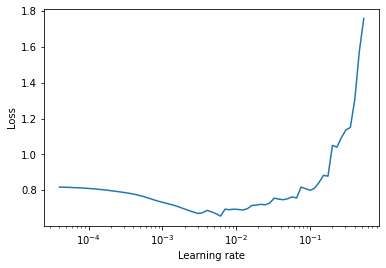

In [18]:
learner.lr_find(start_lr=1e-5,optimizer_type='lamb')


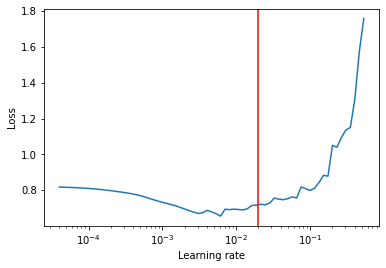

In [19]:
learner.plot(show_lr=2e-2)

In [20]:
learner.fit(epochs=6, lr=6e-5, validate=True, schedule_type="warmup_cosine", optimizer_type="lamb")

Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:247: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


(42, 0.7175382659548805)

In [22]:
learner.save_model()

In [24]:
texts = ['I really love the Netflix original movies',
		 'this movie is not worth watching']
predictions = learner.predict_batch(texts)
predictions

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,


[[('1', 0.6220703125), ('0', 0.3779296875)],
 [('1', 0.69384765625), ('0', 0.306396484375)]]

In [32]:
import os

os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

In [34]:
from fast_bert.prediction import BertClassificationPredictor

MODEL_PATH = 'output/model_out'
device_cuda = torch.device("cuda")

predictor = BertClassificationPredictor(
				model_path=MODEL_PATH,
				label_path=LABEL_PATH, # location for labels.csv file
				multi_label=False,
				model_type='xlnet',
				do_lower_case=False,
        device=device_cuda) # set custom torch.device, defaults to cuda if available

# Single prediction
single_prediction = predictor.predict("just get me result for this text")

# Batch predictions
texts = [
	"this is the first text",
	"this is the second text"
	]

multiple_predictions = predictor.predict_batch(texts)

RuntimeError: ignored

In [36]:
# Language model Databunch
from fast_bert.data_lm import BertLMDataBunch
# Language model learner
from fast_bert.learner_lm import BertLMLearner

from pathlib import Path
from box import Box

In [37]:
# Box is a nice wrapper to create an object from a json dict
args = Box({
    "seed": 42,
    "task_name": 'imdb_reviews_lm',
    "model_name": 'roberta-base',
    "model_type": 'roberta',
    "train_batch_size": 16,
    "learning_rate": 4e-5,
    "num_train_epochs": 20,
    "fp16": True,
    "fp16_opt_level": "O2",
    "warmup_steps": 1000,
    "logging_steps": 0,
    "max_seq_length": 512,
    "multi_gpu": True if torch.cuda.device_count() > 1 else False
})

DATA_PATH = Path('../lm_data/')
LOG_PATH = Path('../logs')
MODEL_PATH = Path('../lm_model_{}/'.format(args.model_type))

DATA_PATH.mkdir(exist_ok=True)
MODEL_PATH.mkdir(exist_ok=True)
LOG_PATH.mkdir(exist_ok=True)

In [40]:
databunch_lm = BertLMDataBunch.from_raw_corpus(
					data_dir=DATA_PATH,
					text_list=texts,
					tokenizer=args.model_name,
					batch_size_per_gpu=args.train_batch_size,
					max_seq_length=args.max_seq_length,
                    multi_gpu=args.multi_gpu,
                    model_type=args.model_type,
                    logger=logger)

Setting 'max_len_single_sentence' is now deprecated. This value is automatically set up.


ValueError: ignored